<a href="https://colab.research.google.com/github/AARohanAA/BTC/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from bs4 import BeautifulSoup
import requests 
import time
import ipywidgets as widgets
import datetime
import matplotlib.pyplot as plt


In [66]:
def get_crypto_price(coin):

    url = "https://www.google.com/search?q="+coin+"+price usd"
    HTML = requests.get(url) 
    soup = BeautifulSoup(HTML.text, 'html.parser') 
    text = soup.find("div", attrs={'class':'BNeawe iBp4i AP7Wnd'}).find("div", attrs={'class':'BNeawe iBp4i AP7Wnd'}).text
    return text
    
def conv(price):
    price = price.split()
    price = price[0]
    x = 0
    for i in range(len(price)):
        if price[i] == ',':
           x = i
    return price[:x] + price[x+1:]

In [70]:
mode = widgets.Dropdown(options = ['Mode 1', 'Mode 2'])
display(mode)

Dropdown(options=('Mode 1', 'Mode 2'), value='Mode 1')

In [73]:
ismode1 = True
if mode.value == 'Mode 1':
    Crypto = widgets.Dropdown(options = ['bitcoin', 'ethereum'])
    Time = widgets.IntText()
    display(Crypto)
    display(Time)
    ismode1 = True
else:
    Time = widgets.IntText()
    display(Time)
    ismode1 = False


IntText(value=0)

IntProgress(value=7, description='Loading:', max=10)

IntProgress(value=10, description='Done!:', max=10)

Label(value='Change for bitcoin: 0.0')

Label(value='Percent change for bitcoin: 0.0')

Label(value='Change for ethereum: 0.0')

Label(value='Percent change for ethereum: 0.0')

Label(value='Min price btc: 0')

Label(value='Min time btc: 17:23:13.153149')

Label(value='Max price btc: 35,691.70 United States Dollar')

Label(value='Max time btc: 17:43:30.722183')

Label(value='Min price btc: 0')

Label(value='Min time btc: 17:23:13.153169')

Label(value='Max price btc: 1,150.43 United States Dollar')

Label(value='Max time btc: 17:43:30.722198')

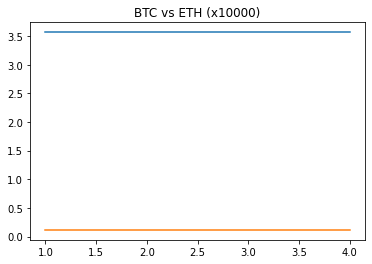

In [74]:
if ismode1:
  crypto = Crypto.value
  times = Time.value
  last_price = -1
  x = []
  y = []
  v = 1
  end_time = time.time() +  times
  min_price = 0
  max_price = 0
  prog = widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
  )
  display(prog)
  while time.time() < end_time:
    
    price = get_crypto_price(crypto)
    last_price = price 
    y.append(float(conv(price))/10000)

    x.append(v)
    v+=1
    
    if float(conv(price)) <= min(y):
        min_price = price
        min_time = datetime.datetime.now().time()
    if float(conv(price)) >= max(y):
        max_price = price
        max_time = datetime.datetime.now().time()
  prog.layout.visibility = 'hidden'
  prog = widgets.IntProgress(
    value=10,
    min=0,
    max=10,
    step=1,
    description='Done!:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
  )
  display(prog)
  change = widgets.Label()
  perchange = widgets.Label()
  minprice = widgets.Label()
  maxprice = widgets.Label()
  mintime = widgets.Label()
  maxtime = widgets.Label()
  change.value = f'Change: {float(y[-1])-float(y[0])}'
  perchange.value = f'Percent change: {(float(y[-1])-float(y[0]))/float(y[0])}'
  minprice.value = f'Min price: {min_price}'
  mintime.value = f'Time at min(Greenwich): {max_time}'
  maxprice.value = f'Max price: {max_price}'
  maxtime.value = f'Time at max(Greenwich): {max_time}'
  display(change)
  display(perchange)
  display(minprice)
  display(mintime)
  display(maxprice)
  display(maxtime)
  plt.title('Plot (x1000)')
  plt.plot(x,y)
  plt.show()
else:
    times = Time.value
    last_price_btc = -1
    last_price_eth = -1
    ybtc = []
    yeth =[]
    x = []
    v = 1
    min_pricebtc = 0
    max_pricebtc = 0
    min_priceeth = 0
    max_priceeth = 0
    cryptobtc = 'bitcoin'
    cryptoeth = 'ethereum'
    end_time = time.time() +  times
    prog = widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
    )
    display(prog)
    while time.time() < end_time: 
        pricebtc = get_crypto_price(cryptobtc)
        priceeth = get_crypto_price(cryptoeth)
        last_pricebtc = pricebtc
        last_priceeth = priceeth
        ybtc.append(float(conv(pricebtc))/10000)
        yeth.append(float(conv(priceeth))/10000)

        x.append(v)
        v+=1
        if float(conv(pricebtc)) <= min(ybtc):
            min_pricebtc = pricebtc
            min_timebtc = datetime.datetime.now().time()
        if float(conv(pricebtc)) >= max(ybtc):
            max_pricebtc = pricebtc
            max_timebtc = datetime.datetime.now().time()
        if float(conv(priceeth)) <= min(yeth):
            min_priceeth = priceeth
            min_timeeth = datetime.datetime.now().time()
        if float(conv(priceeth)) >= max(yeth):
            max_priceeth = priceeth
            max_timeeth = datetime.datetime.now().time()
    prog.layout.visibility = 'hidden'
    prog = widgets.IntProgress(
      value=10,
      min=0,
      max=10,
      step=1,
      description='Done!:',
      bar_style='', # 'success', 'info', 'warning', 'danger' or ''
      orientation='horizontal'
    )
    display(prog)
    changebtc = widgets.Label()
    changeeth = widgets.Label()
    perchangebtc = widgets.Label()
    perchangeeth = widgets.Label()
    minpricebtc = widgets.Label()
    minpriceeth = widgets.Label()
    maxpricebtc = widgets.Label()
    maxpriceeth = widgets.Label()
    mintimebtc = widgets.Label()
    maxtimebtc = widgets.Label()
    mintimeeth = widgets.Label()
    maxtimeeth = widgets.Label()
    changebtc.value = f'Change for bitcoin: {float(ybtc[-1])-float(ybtc[0])}'
    perchangebtc.value = f'Percent change for bitcoin: {(float(ybtc[-1])-float(ybtc[0]))/float(ybtc[0])}'
    changeeth.value = f'Change for ethereum: {float(yeth[-1])-float(yeth[0])}'
    perchangeeth.value = f'Percent change for ethereum: {(float(yeth[-1])-float(yeth[0]))/float(yeth[0])}'
    minpricebtc.value = f'Min price btc: {min_pricebtc}'
    mintimebtc.value = f'Min time btc: {min_timebtc}'
    maxpricebtc.value = f'Max price btc: {max_pricebtc}'
    maxtimebtc.value = f'Max time btc: {max_timebtc}'
    minpriceeth.value = f'Min price btc: {min_priceeth}'
    mintimeeth.value = f'Min time btc: {min_timeeth}'
    maxpriceeth.value = f'Max price btc: {max_priceeth}'
    maxtimeeth.value = f'Max time btc: {max_timeeth}'    
    
    display(changebtc)
    display(perchangebtc)
    display(changeeth)
    display(perchangeeth)
    display(minpricebtc)
    display(mintimebtc)
    display(maxpricebtc)
    display(maxtimebtc)
    display(minpriceeth)
    display(mintimeeth)
    display(maxpriceeth)
    display(maxtimeeth)

    plt.title('BTC vs ETH (x10000)')
    plt.plot(x,ybtc, x, yeth)
    plt.show()

